In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
from glob import glob
img_fnames = glob('*.jpeg')
print(img_fnames)

['black.jpeg', 'index.jpeg']


In [23]:
imgs = []
for fname in img_fnames:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img.shape[0] > img.shape[1]:
        img = cv2.transpose(img)
    imgs.append(img)

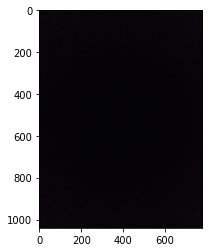

In [8]:
# Vamos a mostrar una de las fotos a ver qué salió, ¡tendría que ser todo negro!

img = cv2.imread("black.jpeg")

# pasamos a RGB (acuérdense que OpenCV usa BGR!)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

In [9]:
print("Menor intensidad =", np.min([img]))
print("Mayor intensidad =", np.max([img]))

Menor intensidad = 0
Mayor intensidad = 24


Mayor intensidad = 255


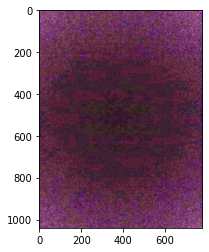

In [10]:
img_norm = cv2.normalize(img, 0, 255, norm_type=cv2.NORM_INF)
# ojo acá al normalizar es común usar NORM_MINMAX, si el mínimo de la imagen es 0 entonces son lo mismo,
# pero si llegara a ser distinto de cero entonces NORM_MINMAX correría el mínimo a cero y perderíamos
# información de ruido, en este caso sería un offset. NORM_INF nos da la norma infinito de la matriz 
# (el máximo de los valores absolutos de los elementos).
print("Mayor intensidad =", np.max([img_norm]))

plt.imshow(img_norm)

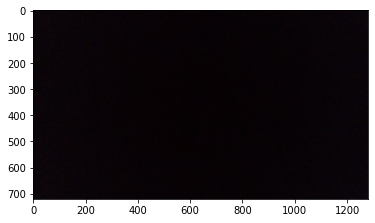

In [24]:
img_promedio = np.zeros_like(imgs[0])
n = len(imgs)
for img in imgs:
    img_promedio = img_promedio + img/n

img_promedio = img_promedio.astype(np.uint8)

plt.imshow(img_promedio)

(2, 720, 1280, 3)
(720, 1280, 3)
(720, 1280, 3)


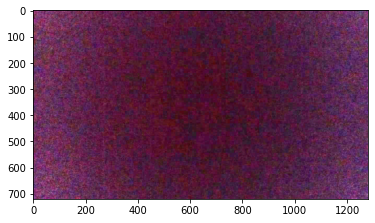

In [32]:
img_promedio_norm = cv2.normalize(img_promedio, 0, 255, norm_type=cv2.NORM_INF)
plt.imshow(img_promedio_norm)

imgs_np = np.stack(imgs)

# Media:
img_media = np.mean(imgs_np, axis=0)

# desvío:
img_std = np.std(imgs_np, axis=0)

print(imgs_np.shape)
print(img_media.shape)
print(img_std.shape)

In [33]:
img_media = np.mean(imgs_np, axis=0)

# desvío:
img_std = np.std(imgs_np, axis=0)

Std Rojo


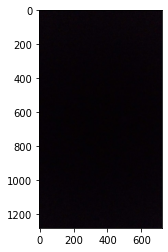

<Figure size 432x288 with 0 Axes>

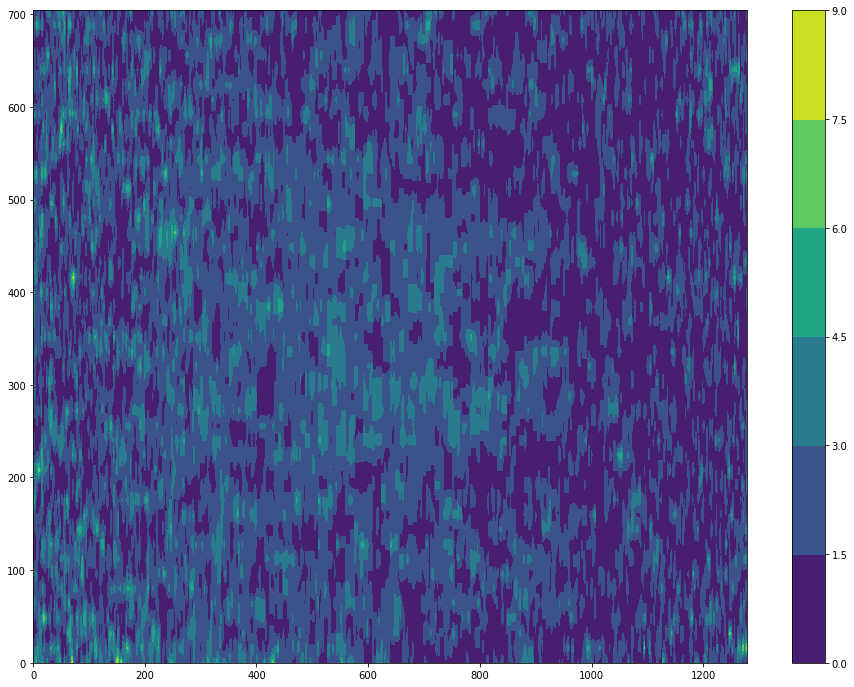

Std Verde


<Figure size 432x288 with 0 Axes>

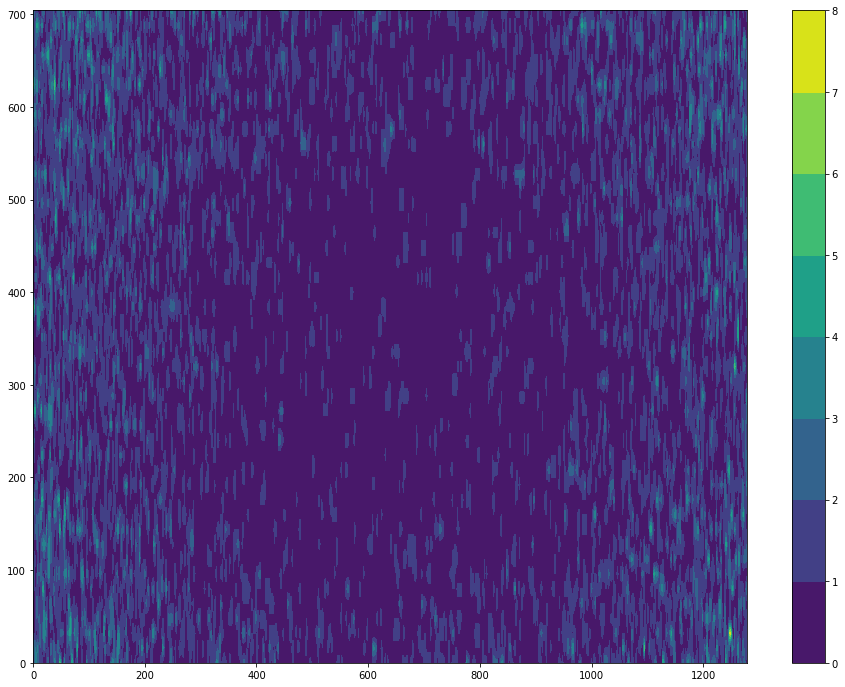

Std Azul


<Figure size 432x288 with 0 Axes>

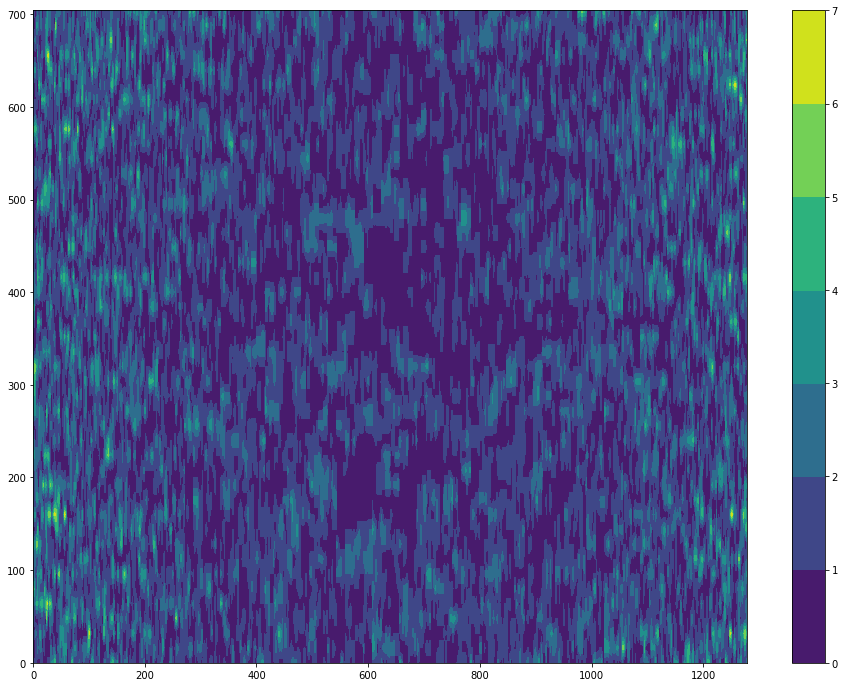

Media Rojo


<Figure size 432x288 with 0 Axes>

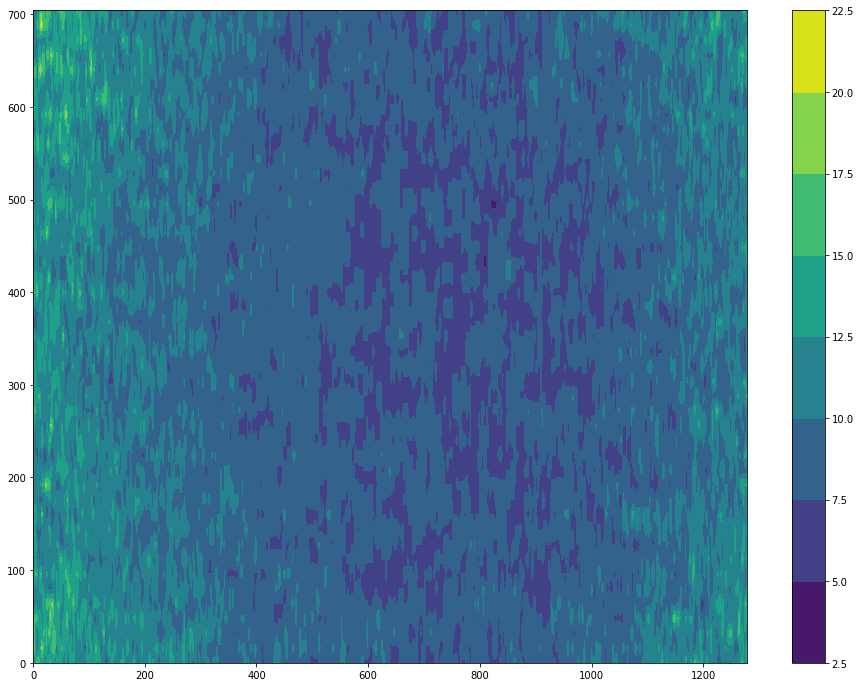

Media Verde


<Figure size 432x288 with 0 Axes>

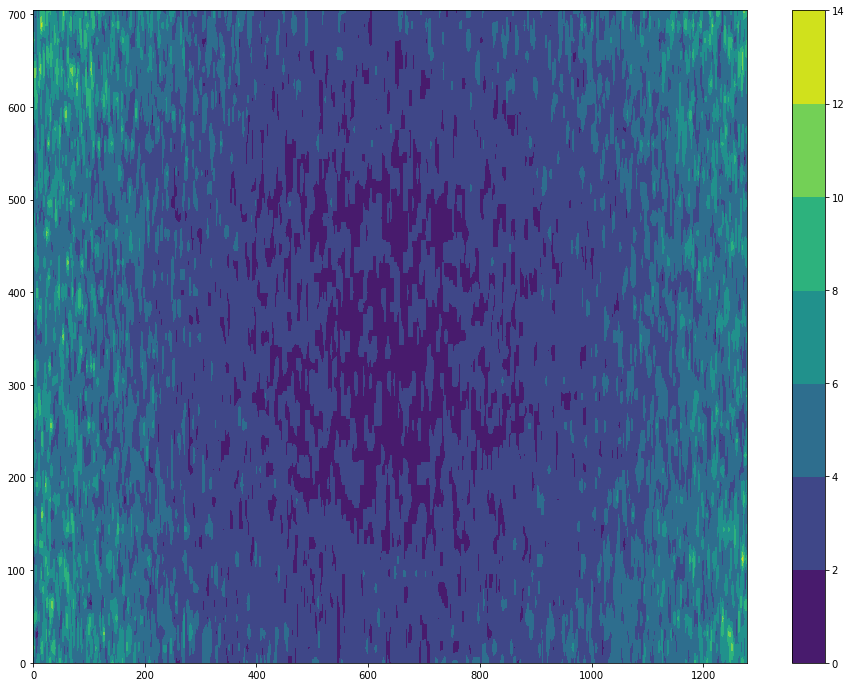

Media Azul


<Figure size 432x288 with 0 Axes>

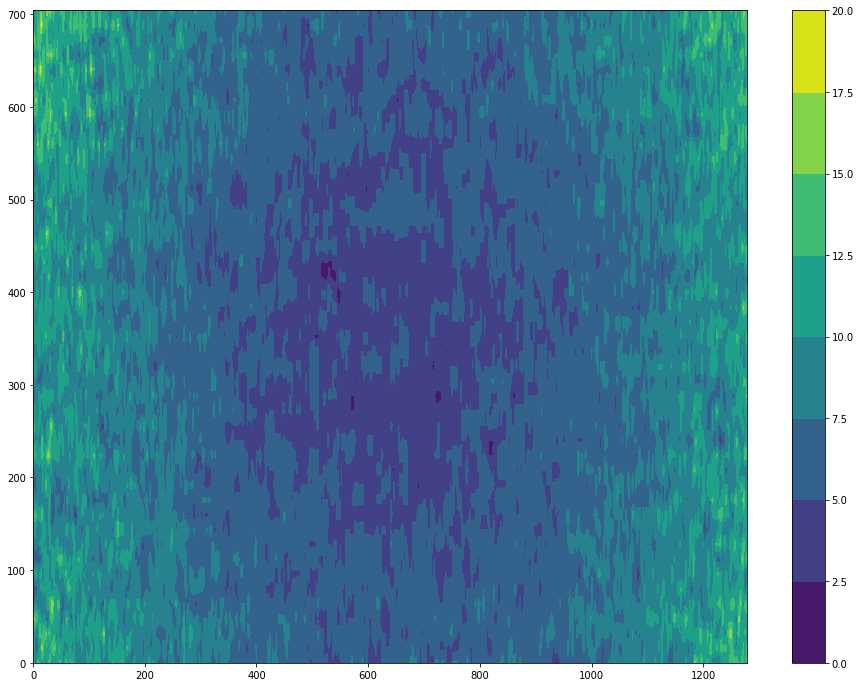

In [36]:
img = cv2.imread(img_fnames[0])

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

alto = img.shape[1]
ancho = img.shape[0]

def dibujar_contorno(mat):
    fig = plt.figure()
    X, Y = np.meshgrid(range(ancho), range(alto))
    Z = mat

    # decimación para no matar la compu calculando contornos!
    dec = 16

    fig = plt.figure(figsize=(16,12))
    cp = plt.contourf(X[::dec], Y[::dec], Z[::dec])
    fig.colorbar(cp)
    plt.show()
    
print('Std Rojo')
dibujar_contorno(img_std[:,:,0])
print('Std Verde')
dibujar_contorno(img_std[:,:,1])
print('Std Azul')
dibujar_contorno(img_std[:,:,2])
print('Media Rojo')
dibujar_contorno(img_media[:,:,0])
print('Media Verde')
dibujar_contorno(img_media[:,:,1])
print('Media Azul')
dibujar_contorno(img_media[:,:,2])

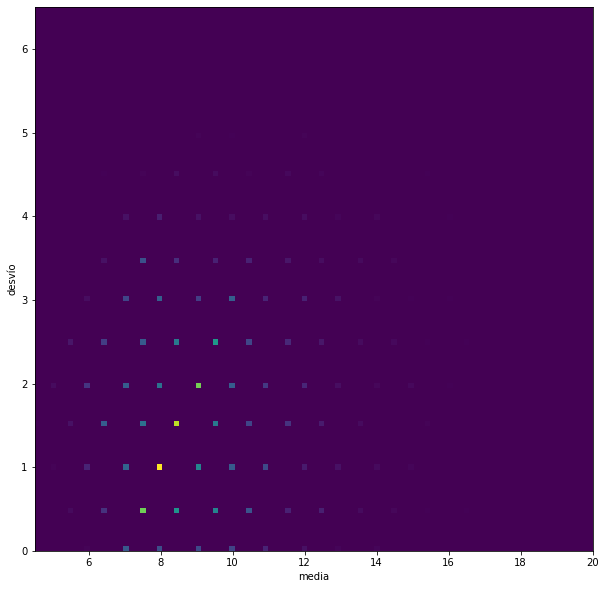

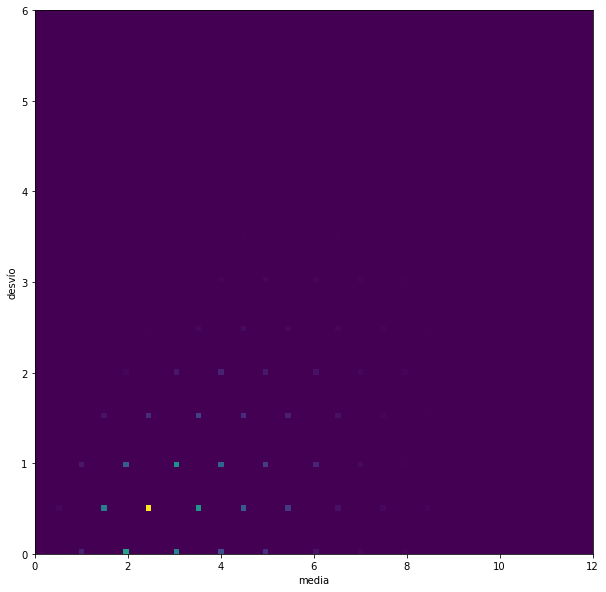

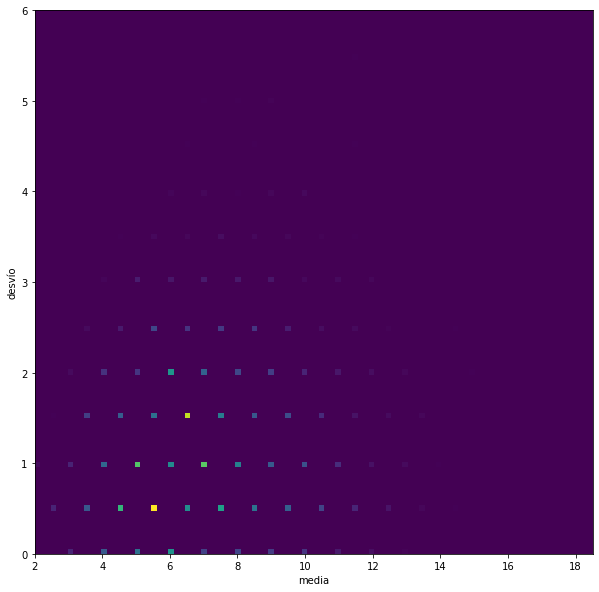

In [37]:
dec = 100

todos_los_rojos_std = np.ravel(img_std[:,:,0])
todos_los_rojos_media = np.ravel(img_media[:,:,0])

todos_los_verdes_std = np.ravel(img_std[:,:,1])
todos_los_verdes_media = np.ravel(img_media[:,:,1])

todos_los_azules_std = np.ravel(img_std[:,:,2])
todos_los_azules_media = np.ravel(img_media[:,:,2])

plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_rojos_media[::dec], todos_los_rojos_std[::dec], bins=100)
 # plt.colorbar(cb)

plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_verdes_media[::dec], todos_los_verdes_std[::dec], bins=100)
 # plt.colorbar(cb)

plt.figure(figsize=(10,10))
plt.xlabel('media')
plt.ylabel('desvío')
cb = plt.hist2d(todos_los_azules_media[::dec], todos_los_azules_std[::dec], bins=100)
 # plt.colorbar(cb)

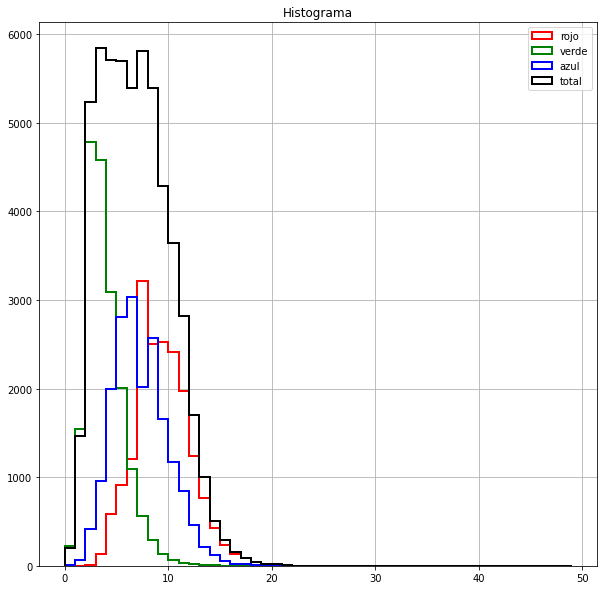

In [38]:
dec = 100
plt.figure(figsize=(10,10))
plt.title('Histograma')
todos_los_rojos = np.ravel(imgs_np[:,:,:,0])
todos_los_verdes = np.ravel(imgs_np[:,:,:,1])
todos_los_azules = np.ravel(imgs_np[:,:,:,2])
plt.grid()
i_max = 50
_ = plt.hist(todos_los_rojos[::dec], bins=range(i_max), color='red',histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_verdes[::dec], bins=range(i_max), color='green', histtype='step', linewidth=2.0)
_ = plt.hist(todos_los_azules[::dec], bins=range(i_max), color='blue', histtype='step', linewidth=2.0)

_ = plt.hist(np.ravel(imgs_np)[::dec], bins=range(i_max), color='black', histtype='step', linewidth=2.0)
plt.legend(['rojo', 'verde', 'azul', 'total'])
